# Предсказание популярности объявлений о продаже домов

### Скачивание данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objs as go
import plotly.express as px

https://www.kaggle.com/competitions/best-home2/data?select=test.csv

In [2]:
df_test = pd.read_csv(r'C:\Users\alina\Desktop\test.csv')

In [71]:
df_train = pd.read_csv(r'C:\Users\alina\Desktop\train.csv')

In [4]:
df_train.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


Посмотрим внимательно на наши данные

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


In [6]:
df_train.shape

(34546, 16)

In [7]:
df_train.columns

Index(['Id', 'bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'TARGET'],
      dtype='object')

Фичи:

1.   bathrooms: количество ванных
2.   bedrooms: количество спален
3.   building_id: ID здания
4.   created: дата создания объявления
5.   description
6.   display_address: адрес (текстом)
7.   features: список разных полезных текстовых тегов
8.   latitude: ширина (координата)
9.   listing_id: ID объявления
10.   longitude: долгода (координата)
11.   manager_id: ID риелтора
12.   photos: количество фотографий у объявления
13.   price: цена в долларах
14.   street_address

In [8]:
df_train.describe()

,Id,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,34546.000000,34546.000000,34546.000000,34546.000000,3.454600e+04,34546.000000,3.454600e+04
mean,61873.351618,1.211182,1.540815,40.741878,7.024901e+06,-73.954803,3.888823e+03
std,35718.160364,0.496217,1.116735,0.622257,1.263556e+05,1.126953,2.630662e+04
min,6.000000,0.000000,0.000000,0.000000,6.811965e+06,-75.521400,4.500000e+01
25%,30839.250000,1.000000,1.000000,40.728000,6.917211e+06,-73.991700,2.500000e+03
50%,61822.500000,1.000000,1.000000,40.751600,7.021834e+06,-73.977900,3.150000e+03
75%,92705.500000,1.000000,2.000000,40.774000,7.130020e+06,-73.954900,4.100000e+03
max,124009.000000,6.000000,8.000000,44.603800,7.742803e+06,0.000000,4.490000e+06


In [9]:
df_train.describe(include=['object', 'bool'])

,building_id,created,description,display_address,features,manager_id,photos,street_address,TARGET
count,34546,34546,33509,34458,34546,34546,34546,34542,34546
unique,6378,34186,27757,6998,8245,3134,31992,12398,3
top,0,2016-05-02 03:41:36,,Broadway,[],e6472c7237327dd3903b3d6f6a94515a,[],3333 Broadway,low
freq,5713,3,1126,320,2219,1820,2516,125,23999


In [10]:
df_train.TARGET.value_counts()

low       23999
medium     7860
high       2687
Name: TARGET, dtype: int64

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'listing_id'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

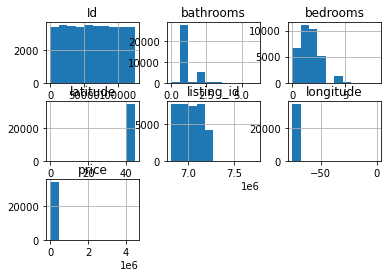

In [11]:
df_train.hist()

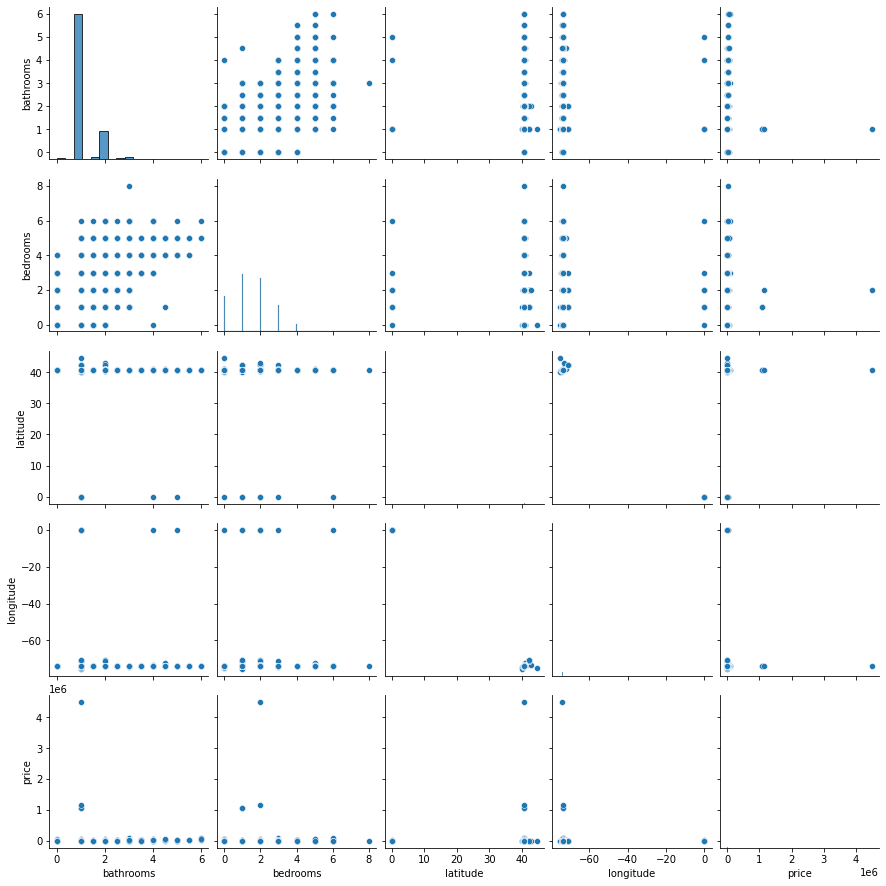

In [12]:
cols = ['bathrooms', 'bedrooms','features', 'latitude', 'longitude', 'price', 'TARGET']
sns_plot = sns.pairplot(df_train[cols])
sns_plot.savefig('pairplot.png')

### *поработаем с пропусками в данных*

In [9]:
df_train.isna().sum()

Id                    0
bathrooms             0
bedrooms              0
building_id           0
created               0
description        1037
display_address      88
features              0
latitude              0
listing_id            0
longitude             0
manager_id            0
photos                0
price                 0
street_address        4
TARGET                0
dtype: int64

In [13]:
for col in df_train.columns:
    pct_missing = np.mean(df_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
bathrooms - 0%
bedrooms - 0%
building_id - 0%
created - 0%
description - 3%
display_address - 0%
features - 0%
latitude - 0%
listing_id - 0%
longitude - 0%
manager_id - 0%
photos - 0%
price - 0%
street_address - 0%
TARGET - 0%


<AxesSubplot:>

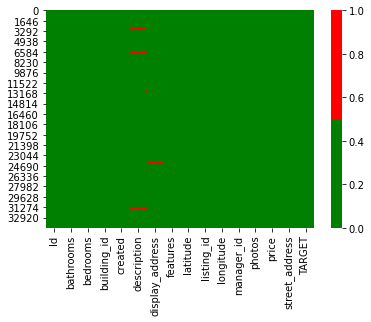

In [16]:
cols = df_train.columns[:] 
#красный пропущенные данные
colours = ['#008000', '#ff0000'] 
sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

Как мы видим пропусков в данных совсем немного, поэтому возьмем из description количество положительных и отрицательных слов и удалим этот столбец.

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import wordnet, pos_tag
from nltk import WordNetLemmatizer
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
positive_words = open(r'C:\Users\alina\Desktop\ml1\Sample-ML-Repo\11. Texts\nlp\positive-words.txt', 'r', encoding="ISO-8859-1")
negative_words = open(r'C:\Users\alina\Desktop\ml1\Sample-ML-Repo\11. Texts\nlp\negative-words.txt', 'r', encoding="ISO-8859-1")

In [18]:
posit = positive_words.read()
negat = negative_words.read()

In [19]:
def positive(t):
    return len([i for i in t.split(' ') if i in posit.split()])

def negative(t):
    return len([i for i in t.split(' ') if i in negat.split()])

In [85]:
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

def cleaning(t):
    if isinstance(t, str):
        t = "".join([i for i in t if not i.isdigit()])
        t = t.lower()
        t = [i.strip(string.punctuation) for i in t.split(' ')]
        t = [i for i in t if i not in stopwords.words('english')]
        return " ".join(t)
    else:
        t = ''
        return t

def stemming(t):
    t = cleaning(t)
    stemmer = SnowballStemmer(language='english')
    t = ' '.join([stemmer.stem(word) for word in t.split()])
    return t

def lemming(t):
    t = cleaning(t)
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = t.split()
    pos_tagged = [(word, get_wordnet_pos(tag)) for word, tag in pos_tag(tokenized_sent)]
    t = ' '.join([lemmatizer.lemmatize(word, tag) for word, tag in pos_tagged])
    return t

In [89]:
df_train.description.head()

0    A FABULOUS 3BR IN MIDTOWN WEST!   PERFECT APAR...
1                      Renovated Kitchen and Bathroom!
2    RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...
3    Newly renovated flex 2 apartment offers the ne...
4    LOW FEE apartments do not come around like thi...
Name: description, dtype: object

In [90]:
df_train['description1'] = df_train.description.apply(lambda x: lemming(x))

In [91]:
df_train.description1

0        fabulous br midtown west perfect apartment upd...
1                                renovate kitchen bathroom
2        rare best deal market perfect studio prime upp...
3        newly renovate flex apartment offer new standa...
4        low fee apartment come around like unit laundr...
                               ...                        
34541    newly renovate bedroom apartment locate th ave...
34542    apartment newly renovate feature bleached-plan...
34543    cdata bedroom astoria long island city<br br l...
34544    coopercooper.com list id west th street apt g ...
34545    renovate two bedroom apartment beautiful hardw...
Name: description1, Length: 34546, dtype: object

In [92]:
df_train['Positive'] = df_train.description1.apply(lambda x: positive(x))
df_train['Negative'] = df_train.description1.apply(lambda x: negative(x))

In [93]:
df_train['Positive']

0         7
1         0
2         3
3        14
4         8
         ..
34541     3
34542     1
34543     1
34544     7
34545     5
Name: Positive, Length: 34546, dtype: int64

In [94]:
df_train['Negative']

0        1
1        0
2        0
3        1
4        0
        ..
34541    0
34542    0
34543    0
34544    0
34545    0
Name: Negative, Length: 34546, dtype: int64

In [100]:
del df_train['description']

In [101]:
del df_train['description1']

посмотрим есть ли дубликаты 

In [102]:
df_dedupped = df_train.drop('Id', axis=1).drop_duplicates()

print(df_train.shape)
print(df_dedupped.shape)

(34546, 17)
(34546, 16)


In [103]:
df_dedupped.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'display_address',
       'features', 'latitude', 'listing_id', 'longitude', 'manager_id',
       'photos', 'price', 'street_address', 'TARGET', 'Positive', 'Negative'],
      dtype='object')

In [104]:
df_train.columns

Index(['Id', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'TARGET', 'Positive',
       'Negative'],
      dtype='object')

Дубликатов нет

Удалим оставшиесь с nan строчки

In [105]:
df_train.isna().sum()

Id                  0
bathrooms           0
bedrooms            0
building_id         0
created             0
display_address    88
features            0
latitude            0
listing_id          0
longitude           0
manager_id          0
photos              0
price               0
street_address      4
TARGET              0
Positive            0
Negative            0
dtype: int64

In [128]:
df_train = df_train.dropna(axis=0)

In [108]:
df_train.isna().sum()

Id                 0
bathrooms          0
bedrooms           0
building_id        0
created            0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
TARGET             0
Positive           0
Negative           0
dtype: int64

In [109]:
df_train.to_csv('train_new1.csv') 

На этом работу с пропущенными данными закончим))

### *Поработаем с гео данными*

In [145]:
df_train = pd.read_csv('train_new1.csv') 

In [146]:
df_train.shape

(34457, 18)

In [147]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

c:\Users\alina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

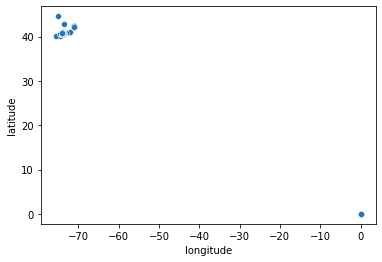

In [148]:
sns.scatterplot(df_train['longitude'], df_train['latitude'])

видим в нуле выбросы, удалим их

In [149]:
df_train['latitude'].describe()

count    34457.000000
mean        40.741882
std          0.623056
min          0.000000
25%         40.728100
50%         40.751600
75%         40.774000
max         44.603800
Name: latitude, dtype: float64

In [150]:
df_train['longitude'].describe()

count    34457.000000
mean       -73.954742
std          1.128406
min        -75.521400
25%        -73.991700
50%        -73.977900
75%        -73.954900
max          0.000000
Name: longitude, dtype: float64

In [151]:
df_train = df_train.loc[(df_train['latitude'] < 44.0) & (df_train['longitude'] < -72)]
df_train = df_train.loc[(df_train['latitude'] > 39.0) & (df_train['longitude'] > -75)]

Посмотрим что получилось

c:\Users\alina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

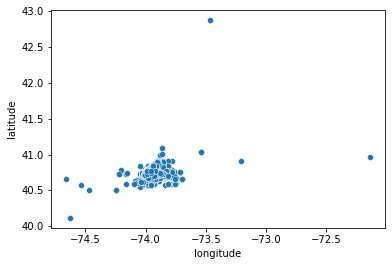

In [152]:
sns.scatterplot(df_train['longitude'], df_train['latitude'])

c:\Users\alina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

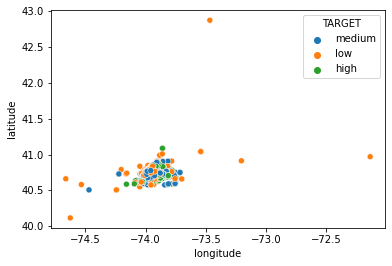

In [153]:
sns.scatterplot(df_train['longitude'], df_train['latitude'], hue=df_train["TARGET"])

In [154]:
df_train.isna().sum()

Unnamed: 0         0
Id                 0
bathrooms          0
bedrooms           0
building_id        0
created            0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
TARGET             0
Positive           0
Negative           0
dtype: int64

Добавим данные о штате

In [155]:
import pandas as pd
import requests

from tqdm import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
from tqdm import tqdm

for i in tqdm(range(df_train.shape[0])):
    lat = df_train.iloc[i]['latitude']
    lon = df_train.iloc[i]['longitude']
    df_train.loc[ i ,'state'] = geolocator.reverse(str(lat) + "," + str(lon)).raw['address'].get('state', '')


In [157]:
def geo(i):
    return geolocator.reverse(str(df_train.iloc[i]['latitude']) + "," + str(df_train.iloc[i]['longitude'])).raw['address'].get('state', '')

In [158]:
df_train['id_tmp'] = np.arange(df_train.shape[0])

In [ ]:
df_train['state'] = df_train.id_tmp.progress_apply(geo)

In [144]:
df_train.shape

(548, 19)

### *Поработаем с колонкой features*

In [162]:
from collections import Counter

df_train.features.head()

0            ['Laundry In Unit', 'No Fee', 'Elevator']
1           ['Dogs Allowed', 'Cats Allowed', 'No Fee']
2                      ['Elevator', 'Hardwood Floors']
3    ['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...
4    ['Laundry in Building', 'Laundry in Unit', 'Di...
Name: features, dtype: object

In [165]:
features = []

for i in range(df_train.shape[0]):
   feat = df_train.iloc[i]['features']
   if feat.find(' * ') > 0:
     feat = feat[2:-2].split(" * ")
   else:
     feat = feat[2:-2].split("', '")
   features.extend(feat)

features = [x.lower() for x in features]

In [187]:
l = Counter(features).most_common()[:30]

In [188]:
l

[('elevator', 18448),
 ('hardwood floors', 16535),
 ('cats allowed', 16377),
 ('dogs allowed', 15341),
 ('doorman', 14712),
 ('dishwasher', 14599),
 ('laundry in building', 13250),
 ('no fee', 12561),
 ('fitness center', 9229),
 ('laundry in unit', 6637),
 ('pre-war', 6375),
 ('roof deck', 4600),
 ('outdoor space', 3670),
 ('dining room', 3642),
 ('high speed internet', 3014),
 ('', 2196),
 ('balcony', 2152),
 ('swimming pool', 1911),
 ('new construction', 1840),
 ('terrace', 1627),
 ('exclusive', 1498),
 ('loft', 1476),
 ('garden/patio', 1342),
 ('wheelchair access', 967),
 ('prewar', 956),
 ('common outdoor space', 878),
 ('hardwood', 751),
 ('fireplace', 652),
 ('simplex', 645),
 ('lowrise', 551)]

In [189]:
l[0][0]

'elevator'

Возьмем эти 30 фитч и сделаем one hot кодировние

In [193]:
def one_hot(feature):
    def one_hot_ecoding(s):
        x = str(s)[1:-1].split(', ')
        for elem in x:
            if (elem.lower() == feature):
                return 1
        return 0
    return one_hot_ecoding

In [194]:
for i in l:
    df_train[i[0]] = df_train.features.apply(one_hot(i[0]))

In [195]:
df_train.columns

Index(['Unnamed: 0', 'Id', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'TARGET', 'Positive',
       'Negative', 'id_tmp', 'elevator', 'hardwood floors', 'cats allowed',
       'dogs allowed', 'doorman', 'dishwasher', 'laundry in building',
       'no fee', 'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', '', 'balcony',
       'swimming pool', 'new construction', 'terrace', 'exclusive', 'loft',
       'garden/patio', 'wheelchair access', 'prewar', 'common outdoor space',
       'hardwood', 'fireplace', 'simplex', 'lowrise'],
      dtype='object')

In [197]:
df_train.isna().sum()

Unnamed: 0              0
Id                      0
bathrooms               0
bedrooms                0
building_id             0
created                 0
display_address         0
features                0
latitude                0
listing_id              0
longitude               0
manager_id              0
photos                  0
price                   0
street_address          0
TARGET                  0
Positive                0
Negative                0
id_tmp                  0
elevator                0
hardwood floors         0
cats allowed            0
dogs allowed            0
doorman                 0
dishwasher              0
laundry in building     0
no fee                  0
fitness center          0
laundry in unit         0
pre-war                 0
roof deck               0
outdoor space           0
dining room             0
high speed internet     0
                        0
balcony                 0
swimming pool           0
new construction        0
terrace     

### *Удалим все лишниии колонки)*

In [198]:
df_train.columns

Index(['Unnamed: 0', 'Id', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'TARGET', 'Positive',
       'Negative', 'id_tmp', 'elevator', 'hardwood floors', 'cats allowed',
       'dogs allowed', 'doorman', 'dishwasher', 'laundry in building',
       'no fee', 'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', '', 'balcony',
       'swimming pool', 'new construction', 'terrace', 'exclusive', 'loft',
       'garden/patio', 'wheelchair access', 'prewar', 'common outdoor space',
       'hardwood', 'fireplace', 'simplex', 'lowrise'],
      dtype='object')

In [201]:
del df_train['Unnamed: 0']
del df_train['Id']
del df_train['photos']
del df_train['']
del df_train['listing_id']
del df_train['manager_id']

In [202]:
df_train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'display_address',
       'features', 'latitude', 'longitude', 'price', 'street_address',
       'TARGET', 'Positive', 'Negative', 'id_tmp', 'elevator',
       'hardwood floors', 'cats allowed', 'dogs allowed', 'doorman',
       'dishwasher', 'laundry in building', 'no fee', 'fitness center',
       'laundry in unit', 'pre-war', 'roof deck', 'outdoor space',
       'dining room', 'high speed internet', 'balcony', 'swimming pool',
       'new construction', 'terrace', 'exclusive', 'loft', 'garden/patio',
       'wheelchair access', 'prewar', 'common outdoor space', 'hardwood',
       'fireplace', 'simplex', 'lowrise'],
      dtype='object')

In [204]:
def find_cat(data, num_uniq=4):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка,'
        if (s!=name):
            print (s)
            
find_cat(df_train)

building_id строка,
created строка,
display_address строка,
features строка,
street_address строка,
TARGET строка,


In [205]:
del df_train['features']

In [207]:
df_train['building_id'].value_counts()

0                                   5703
96274288c84ddd7d5c5d8e425ee75027     196
80a120d6bc3aba97f40fee8c2204524b     161
11e1dec9d14b1a9e528386a2504b3afc     150
bb8658a3e432fb62a440615333376345     141
                                    ... 
2e8f9a840753425993000fd0ad19bb83       1
8aec1f11e4857c86f49fa6ecb7147353       1
0c1e3a49def9ecbb705d55de24bb2308       1
52cefaf6791138bac274593eb602c28b       1
e6db31130e8e222eece4be6a08eaf84b       1
Name: building_id, Length: 6349, dtype: int64

In [215]:
del df_train['building_id']

слишком много разросненой инфы, удалим его

In [208]:
df_train['created'].value_counts()

2016-05-02 03:41:36    3
2016-06-21 04:44:43    3
2016-04-08 01:14:27    3
2016-05-27 03:59:28    3
2016-06-05 01:32:36    3
                      ..
2016-06-16 07:20:05    1
2016-06-16 03:42:32    1
2016-05-04 01:25:55    1
2016-04-28 03:14:32    1
2016-04-20 02:21:36    1
Name: created, Length: 34079, dtype: int64

года везде одинаковые, так что не будем учитывать его

In [214]:
del df_train['created']

In [209]:
df_train['display_address'].value_counts()

Broadway                                          320
East 34th Street                                  248
Second Avenue                                     233
Wall Street                                       228
West 37th Street                                  203
                                                 ... 
356 Henry St.                                       1
GOLD STREET                                         1
399 12th Street                                     1
409 Madison Street (Between Tompkins & Throop)      1
1090 Saint Nicholas Avenue                          1
Name: display_address, Length: 6984, dtype: int64

поработаем с этим признаком

In [210]:
def find(s):
    x = str(s).split(' ')
    i = 0
    while(i < len(x) and not x[i].isdigit()):
        i += 1
    if (i == len(x)):
        return 0
    return int(x[i])

In [211]:
df_train['display_address'] = df_train['display_address'].apply(find)

аналогично

In [213]:
df_train['street_address'] = df_train['street_address'].apply(find)

Посмотрим что получилось

In [216]:
find_cat(df_train)

TARGET строка,


### Обучим модель

In [217]:
df_train.columns

Index(['bathrooms', 'bedrooms', 'display_address', 'latitude', 'longitude',
       'price', 'street_address', 'TARGET', 'Positive', 'Negative', 'id_tmp',
       'elevator', 'hardwood floors', 'cats allowed', 'dogs allowed',
       'doorman', 'dishwasher', 'laundry in building', 'no fee',
       'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', 'balcony',
       'swimming pool', 'new construction', 'terrace', 'exclusive', 'loft',
       'garden/patio', 'wheelchair access', 'prewar', 'common outdoor space',
       'hardwood', 'fireplace', 'simplex', 'lowrise'],
      dtype='object')

In [218]:
df_train.TARGET.value_counts()

low       23926
medium     7839
high       2674
Name: TARGET, dtype: int64

видим несбалансированные классы

In [219]:
target_nums = {"TARGET": {"low": 1, "medium": 2, "high": 3}}
df_train = df_train.replace(target_nums)
df_train['TARGET']

0        2
1        2
2        1
3        1
4        1
        ..
34452    1
34453    2
34454    1
34455    2
34456    2
Name: TARGET, Length: 34439, dtype: int64

In [220]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

Сбалансируем наши классы

In [223]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print(Counter(y))

sm = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(Counter(y_res))

Counter({1: 23926, 2: 7839, 3: 2674})
Counter({2: 23926, 1: 23926, 3: 23926})


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_norm1 = sc.fit_transform(X_train1)
X_test_norm1 = sc.transform(X_test1)

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [226]:
log_reg1 = LogisticRegression(max_iter=1000) 
log_reg1.fit(X_train_norm1, y_train1)
y_pred_log1 = log_reg1.predict(X_test_norm1)

svm1 = SVC()
svm1.fit(X_train1, y_train1)
y_pred_svm1 = svm1.predict(X_test1)

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1, y_train1)
y_pred_knn1 = knn1.predict(X_test1)

rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train_norm1, y_train1)
y_pred_rf1 = rf1.predict(X_test_norm1)

dt1 = DecisionTreeClassifier()
dt1.fit(X_train_norm1, y_train1)
y_pred_dt1 = dt1.predict(X_test_norm1)

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = [y_pred_log1, y_pred_svm1, y_pred_knn1, y_pred_rf1, y_pred_dt1]
strings = ['LogisticRegression', 'SVM', 'KNN', 'RandomForest', 'DecisionTree']

for m in range(5):
    print(f'model: {strings[m]}')
    print(f'Accuracy: {round(accuracy_score(y_test1, metrics[m]), 3)}')
    print(f'Balanced accuracy: {round(balanced_accuracy_score(y_test1, metrics[m]), 3)}')
    print(f'Precision macro: {round(precision_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'Precision micro: {round(precision_score(y_test1, metrics[m], average="micro"), 3)}')
    print(f'Recall macro: {round(recall_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'Recall micro: {round(recall_score(y_test1, metrics[m], average="micro"), 3)}')
    print(f'F1 macro: {round(f1_score(y_test1, metrics[m], average="macro"), 3)}')
    print(f'F1 micro: {round(f1_score(y_test1, metrics[m], average="micro"), 3)}')
    print('-'*30, '\n')

model: LogisticRegression
Accuracy: 0.489
Balanced accuracy: 0.489
Precision macro: 0.481
Precision micro: 0.489
Recall macro: 0.489
Recall micro: 0.489
F1 macro: 0.474
F1 micro: 0.489
------------------------------ 

model: SVM
Accuracy: 0.437
Balanced accuracy: 0.438
Precision macro: 0.434
Precision micro: 0.437
Recall macro: 0.438
Recall micro: 0.437
F1 macro: 0.419
F1 micro: 0.437
------------------------------ 

model: KNN
Accuracy: 0.697
Balanced accuracy: 0.697
Precision macro: 0.695
Precision micro: 0.697
Recall macro: 0.697
Recall micro: 0.697
F1 macro: 0.688
F1 micro: 0.697
------------------------------ 

model: RandomForest
Accuracy: 0.77
Balanced accuracy: 0.771
Precision macro: 0.768
Precision micro: 0.77
Recall macro: 0.771
Recall micro: 0.77
F1 macro: 0.769
F1 micro: 0.77
------------------------------ 

model: DecisionTree
Accuracy: 0.668
Balanced accuracy: 0.669
Precision macro: 0.668
Precision micro: 0.668
Recall macro: 0.669
Recall micro: 0.668
F1 macro: 0.668
F1 mi

Как мы видим наша лучшая точность - 0.77, достигается с помощью леса